In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec

In [3]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('models/{}.bin'.format(year)))
    for year in range(1720, 1960, 20)
])

In [53]:
def cosine_series(anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

In [54]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

In [140]:
def plot_cosine_series(anchor, query, w=5, h=4):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    print(query)
    
    plt.figure(figsize=(w, h))
    plt.ylim(0, 1)
    plt.title(query)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

poetry


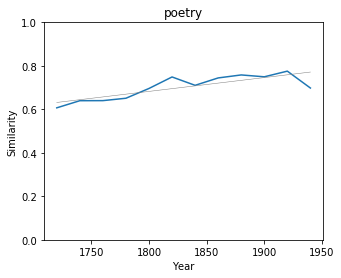

fiction


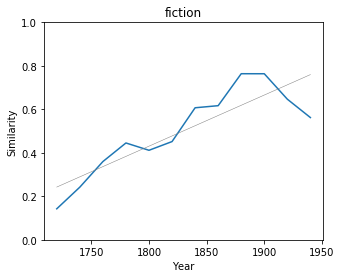

polite


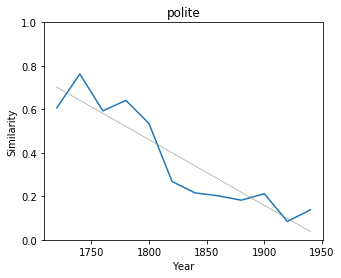

In [141]:
plot_cosine_series('literature', 'poetry')
plot_cosine_series('literature', 'fiction')
plot_cosine_series('literature', 'polite')

In [105]:
def union_neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar])
        
    return vocab

In [106]:
union_vocab = union_neighbor_vocab('literature')

In [144]:
data = []
for token in union_vocab:
    
    series = cosine_series('literature', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [145]:
import pandas as pd

df1 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Increasing

In [146]:
pd.set_option('display.max_rows', 1000)

df1.sort_values('slope', ascending=False).head(50)

,token,slope,p
149,journalism,0.004263,0.000052
18,psychology,0.003640,0.000081
653,archaeology,0.003566,0.000416
449,renaissance,0.003440,0.001242
429,anthropology,0.003316,0.000328
611,sociology,0.003243,0.000100
441,biology,0.003210,0.000165
527,folklore,0.003119,0.000631
579,technique,0.002996,0.001171
573,decadence,0.002940,0.000517


journalism


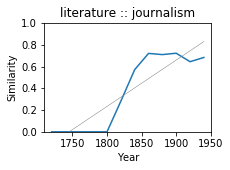

psychology


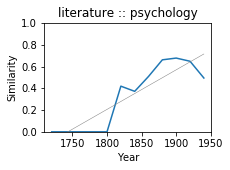

archaeology


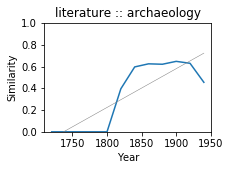

renaissance


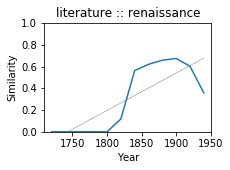

anthropology


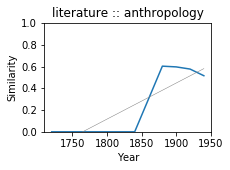

sociology


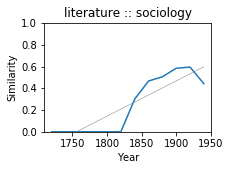

biology


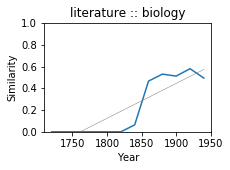

folklore


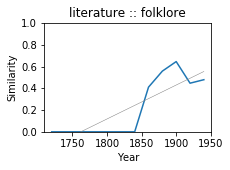

technique


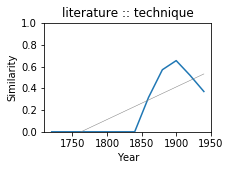

decadence


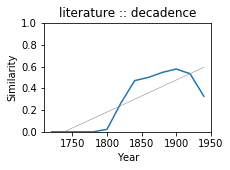

masterpieces


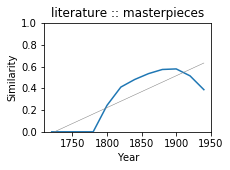

scholarship


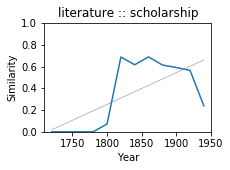

curriculum


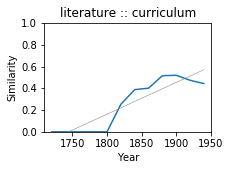

symbolism


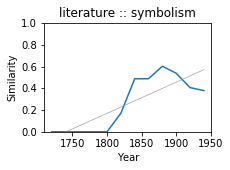

linguistic


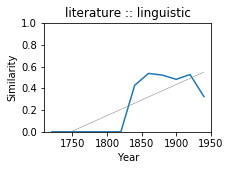

realism


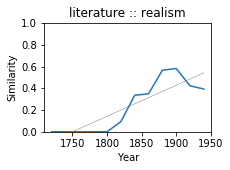

biographies


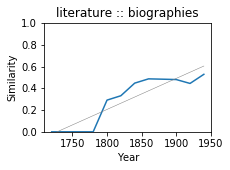

pictorial


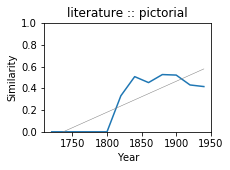

mysticism


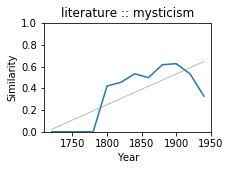

handbook


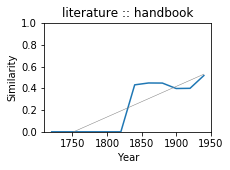

In [139]:
for i, row in df1.sort_values('slope', ascending=False).head(20).iterrows():
    plot_cosine_series('literature', row['token'], 3, 2)

# Decreasing

In [147]:
df1.sort_values('slope', ascending=True).head(50)

,token,slope,p
686,fciences,-0.004180,0.000365
286,aftronomy,-0.003738,0.000200
528,fcience,-0.003655,0.002663
351,philofophy,-0.003592,0.000517
318,claffical,-0.003451,0.000328
161,hiltory,-0.003437,0.000234
451,ftudy,-0.003353,0.000678
858,phyfic,-0.003249,0.000124
53,hiflory,-0.003239,0.000201
248,hillory,-0.003210,0.000312


fciences


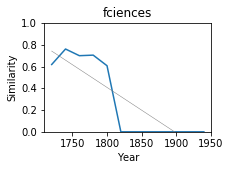

aftronomy


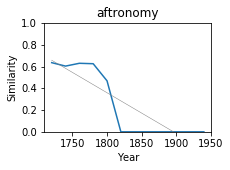

fcience


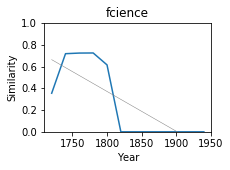

philofophy


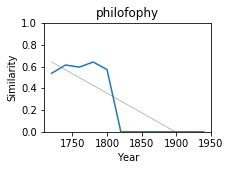

claffical


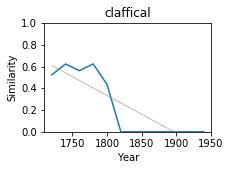

hiltory


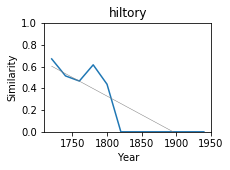

ftudy


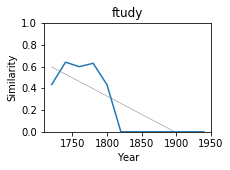

phyfic


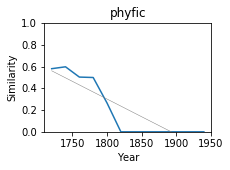

hiflory


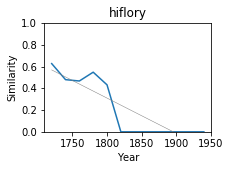

hillory


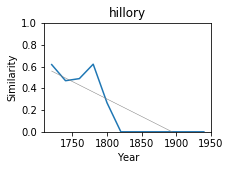

hiitory


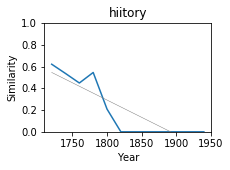

chemiftry


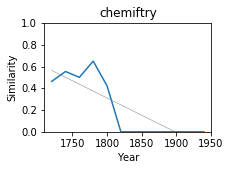

hiftory


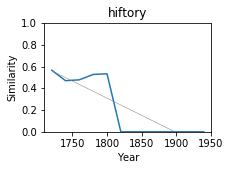

fludy


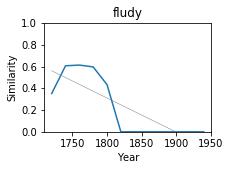

politicks


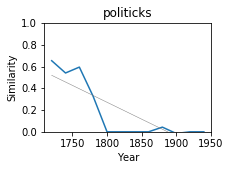

artifts


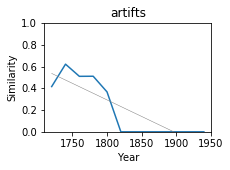

philofophical


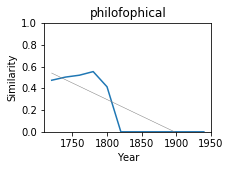

tafle


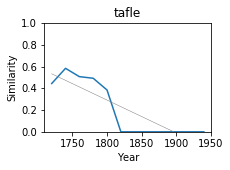

polite


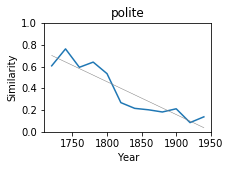

tafte


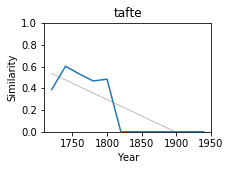

In [142]:
for i, row in df1.sort_values('slope', ascending=True).head(20).iterrows():
    plot_cosine_series('literature', row['token'], 3, 2)

In [148]:
def intersect_neighbor_vocab(anchor, topn=1000):
    
    vocabs = []
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocabs.append(set([s[0] for s in similar]))
        
    return set.intersection(*vocabs)

In [149]:
intersect_vocab = intersect_neighbor_vocab('literature')

In [150]:
data = []
for token in intersect_vocab:
    
    series = cosine_series('literature', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [151]:
import pandas as pd

df2 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Intersected neighbors

In [152]:
df2.sort_values('slope', ascending=False)

,token,slope,p
16,art,0.001591,0.001347
0,culture,0.001178,0.005864
18,language,0.000973,0.000014
20,poetry,0.000636,0.001080
8,sculpture,0.000437,0.071661
10,historians,0.000272,0.316284
21,authors,0.000252,0.388738
7,architecture,0.000204,0.342242
42,drama,0.000203,0.539901
44,philosophy,0.000174,0.550760


art


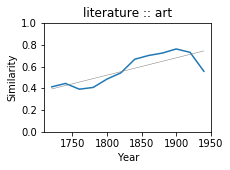

culture


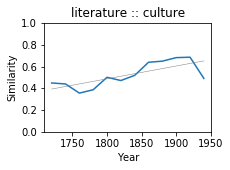

language


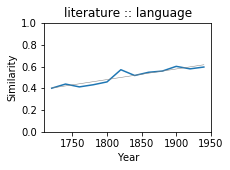

poetry


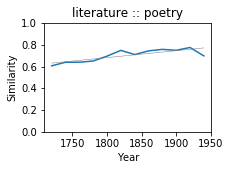

sculpture


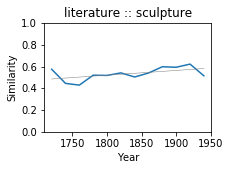

historians


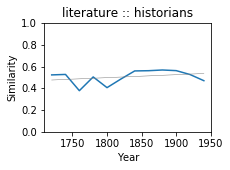

authors


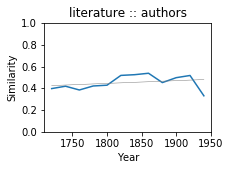

architecture


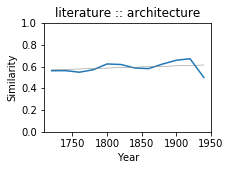

drama


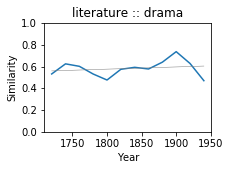

philosophy


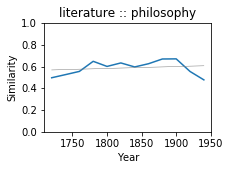

poetical


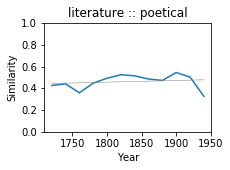

antiquarian


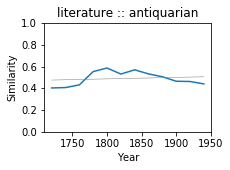

theology


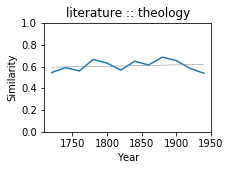

grammar


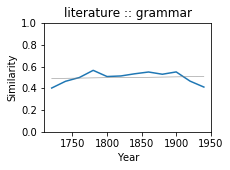

mythology


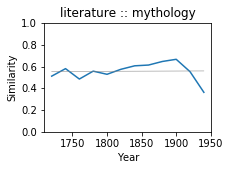

dramatic


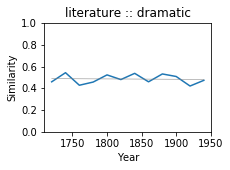

morals


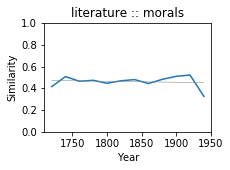

romance


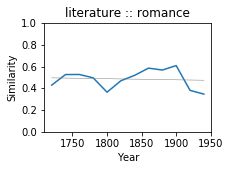

biographical


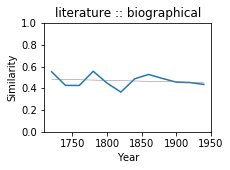

painting


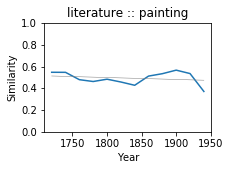

morality


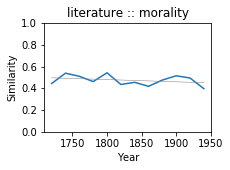

ethics


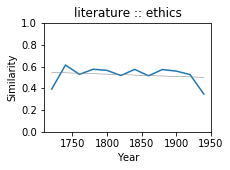

education


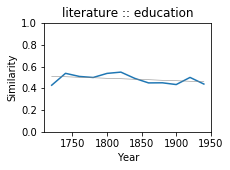

anatomy


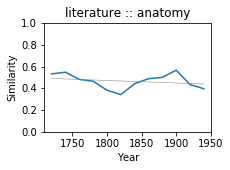

annals


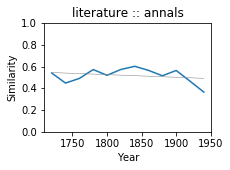

excellence


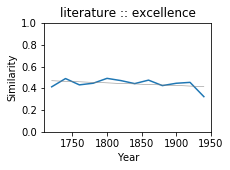

novels


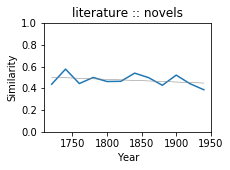

knowledge


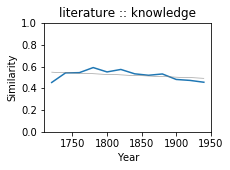

politics


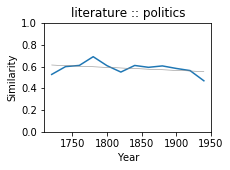

advancement


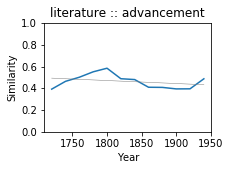

libraries


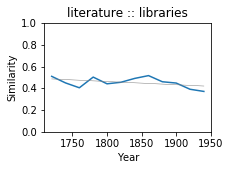

geography


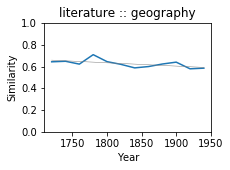

study


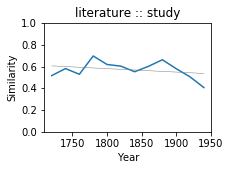

arithmetic


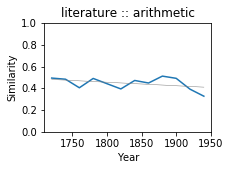

science


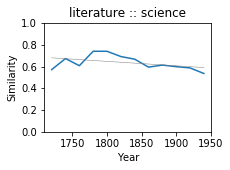

literary


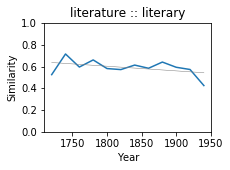

modern


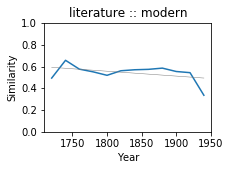

romances


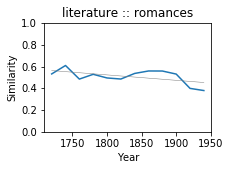

theological


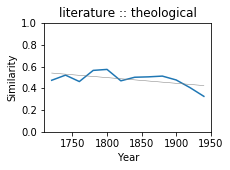

sciences


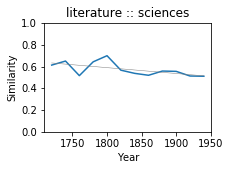

antiquities


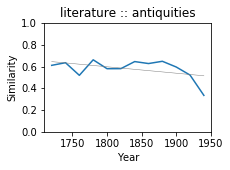

languages


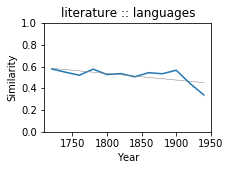

proficiency


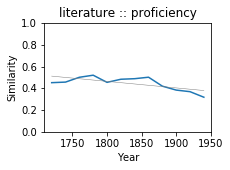

mathematics


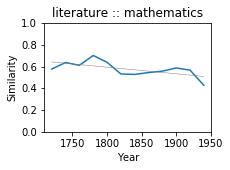

rhetoric


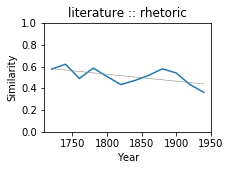

In [138]:
for i, row in df2.sort_values('slope', ascending=False).iterrows():
    plot_cosine_series('literature', row['token'], 3, 2)